In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime


In [3]:
stock = "THYAO.IS"

# time
start_date = datetime(2012, 2, 2)
end_date = datetime.today()

bist30_data = yf.download(stock, start=start_date, end=end_date)

bist30_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-02-02,2.295652,2.304347,2.147826,2.295652,2.257982,54276343
2012-02-03,2.347826,2.382608,2.278260,2.347826,2.309300,47848743
2012-02-06,2.417391,2.417391,2.330434,2.417391,2.377724,32352587
2012-02-07,2.391304,2.443478,2.365217,2.391304,2.352065,32743101
2012-02-08,2.408695,2.426086,2.391304,2.408695,2.369171,23288857


In [4]:
bist30_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-05,262.50,263.25,256.750000,259.000000,259.000000,32211363
2023-12-06,259.00,259.75,251.000000,251.250000,251.250000,28987606
2023-12-07,252.25,259.75,248.899994,259.750000,259.750000,34974072
2023-12-08,259.25,261.00,252.750000,254.000000,254.000000,28379738
2023-12-11,254.25,254.50,246.300003,246.300003,246.300003,33288289


In [7]:
df1=bist30_data.reset_index()['Close']

df1

0         2.295652
1         2.347826
2         2.417391
3         2.391304
4         2.408695
           ...    
3046    259.000000
3047    251.250000
3048    259.750000
3049    254.000000
3050    246.300003
Name: Close, Length: 3051, dtype: float64

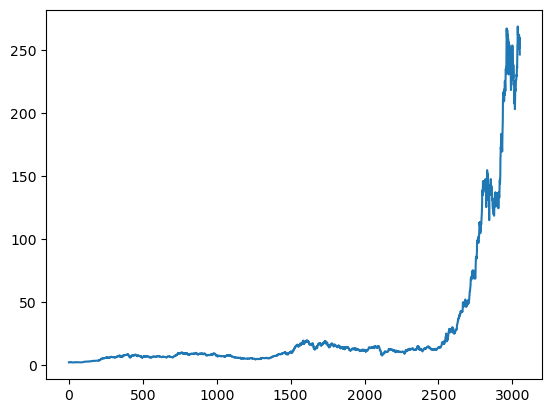

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape

(3051, 1)

In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.85)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size


(2593, 458)

In [18]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)


(2492, 100)
(2492,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
39/39 [==============================] - 9s 141ms/step - loss: 1.7279e-04 - val_loss: 0.0048
Epoch 2/100
39/39 [==============================] - 4s 113ms/step - loss: 1.4780e-05 - val_loss: 0.0099
Epoch 3/100
39/39 [==============================] - 5s 116ms/step - loss: 1.1892e-05 - val_loss: 0.0087
Epoch 4/100
39/39 [==============================] - 5s 116ms/step - loss: 1.0930e-05 - val_loss: 0.0064
Epoch 5/100
39/39 [==============================] - 5s 119ms/step - loss: 1.0075e-05 - val_loss: 0.0052
Epoch 6/100
39/39 [==============================] - 5s 121ms/step - loss: 9.7696e-06 - val_loss: 0.0032
Epoch 7/100
39/39 [==============================] - 5s 124ms/step - loss: 1.0369e-05 - val_loss: 0.0020
Epoch 8/100
39/39 [==============================] - 5s 127ms/step - loss: 8.7726e-06 - val_loss: 0.0018
Epoch 9/100
39/39 [==============================] - 5s 128ms/step - loss: 8.9658e-06 - val_loss: 0.0018
Epoch 10/100
39/39 [==============================] - 5

39/39 [==============================] - 6s 165ms/step - loss: 2.1966e-06 - val_loss: 5.6232e-04
Epoch 78/100
39/39 [==============================] - 7s 177ms/step - loss: 2.0612e-06 - val_loss: 6.5831e-04
Epoch 79/100
39/39 [==============================] - 7s 172ms/step - loss: 2.2845e-06 - val_loss: 0.0024
Epoch 80/100
39/39 [==============================] - 7s 179ms/step - loss: 2.5041e-06 - val_loss: 9.0240e-04
Epoch 81/100
39/39 [==============================] - 7s 173ms/step - loss: 2.3628e-06 - val_loss: 7.5228e-04
Epoch 82/100
39/39 [==============================] - 7s 170ms/step - loss: 2.9021e-06 - val_loss: 0.0025
Epoch 83/100
39/39 [==============================] - 7s 177ms/step - loss: 1.9428e-06 - val_loss: 0.0011
Epoch 84/100
39/39 [==============================] - 7s 178ms/step - loss: 2.4728e-06 - val_loss: 0.0014
Epoch 85/100
39/39 [==============================] - 7s 175ms/step - loss: 2.4532e-06 - val_loss: 7.8534e-04
Epoch 86/100
39/39 [===================

In [26]:
import tensorflow as tf


In [27]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

12/12 [==============================] - 0s 19ms/step


In [28]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10.879694737008391

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

169.65922973958826

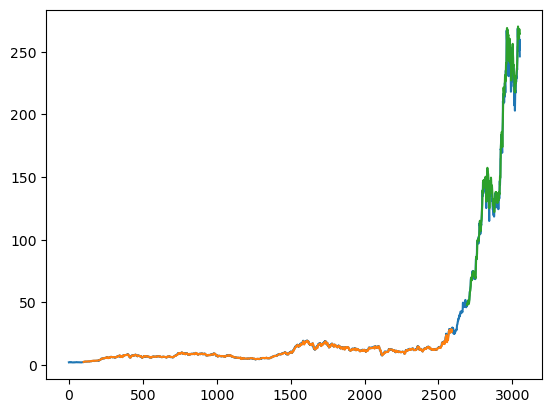

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)


458

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 117)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input


[0.7090223484546503,
 0.7191596229214776,
 0.7822360801338027,
 0.77322518222771,
 0.8047633821889266,
 0.8051388601391354,
 0.7998824552856715,
 0.7976297594540941,
 0.8002579332358802,
 0.7837378773548543,
 0.7784815297912822,
 0.7934997311613647,
 0.8133988594347025,
 0.795377006332625,
 0.8314207125367798,
 0.8374279587108779,
 0.8314207125367798,
 0.8246625104622644,
 0.8077670339209215,
 0.8332979877080402,
 0.8498179862991744,
 0.8742225635255585,
 0.8715943897437725,
 0.8592043621554759,
 0.8798543890393394,
 0.8742225635255585,
 0.9260353697103217,
 0.9939926965360104,
 0.9748444668731984,
 0.9680863220885746,
 0.9624544965747936,
 0.9894873048728556,
 0.9733426696521468,
 0.9669600028177318,
 0.9474362952047111,
 0.9759709007238246,
 0.9357971662269404,
 0.9643317717460539,
 0.9489380924257627,
 0.8918689386774272,
 0.8573270869842157,
 0.8854862145531205,
 0.953068120718492,
 0.9226562400281181,
 0.911768066950765,
 0.9455590200334507,
 0.9406780931301956,
 0.938049919348409

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=116
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.71915962 0.78223608 0.77322518 0.80476338 0.80513886 0.79988246
 0.79762976 0.80025793 0.78373788 0.77848153 0.79349973 0.81339886
 0.79537701 0.83142071 0.83742796 0.83142071 0.82466251 0.80776703
 0.83329799 0.84981799 0.87422256 0.87159439 0.85920436 0.87985439
 0.87422256 0.92603537 0.9939927  0.97484447 0.96808632 0.9624545
 0.9894873  0.97334267 0.96696    0.9474363  0.9759709  0.93579717
 0.96433177 0.94893809 0.89186894 0.85732709 0.88548621 0.95306812
 0.92265624 0.91176807 0.94555902 0.94067809 0.93804992 0.91176807
 0.91026627 0.90538534 0.87234529 0.87797711 0.86183254 0.88736349
 0.84456164 0.81077069 0.81264796 0.83029434 0.86521167 0.84080709
 0.86483619 0.84606344 0.85695161 0.90500986 0.90238169 0.94330627
 0.92190534 0.88736349 0.89862714 0.88698801 0.84493706 0.88586169
 0.85582529 0.83705254 0.82616431 0.82916796 0.83705254 0.80476338
 0.79387521 0.76947063 0.79425063 0.81039521 0.75407695 0.7961279
 0.80739156 0.81377428 0.80776703 0.81077069 0.82916

10 day output [[1.1080436]]
11 day input [0.81339886 0.79537701 0.83142071 0.83742796 0.83142071 0.82466251
 0.80776703 0.83329799 0.84981799 0.87422256 0.87159439 0.85920436
 0.87985439 0.87422256 0.92603537 0.9939927  0.97484447 0.96808632
 0.9624545  0.9894873  0.97334267 0.96696    0.9474363  0.9759709
 0.93579717 0.96433177 0.94893809 0.89186894 0.85732709 0.88548621
 0.95306812 0.92265624 0.91176807 0.94555902 0.94067809 0.93804992
 0.91176807 0.91026627 0.90538534 0.87234529 0.87797711 0.86183254
 0.88736349 0.84456164 0.81077069 0.81264796 0.83029434 0.86521167
 0.84080709 0.86483619 0.84606344 0.85695161 0.90500986 0.90238169
 0.94330627 0.92190534 0.88736349 0.89862714 0.88698801 0.84493706
 0.88586169 0.85582529 0.83705254 0.82616431 0.82916796 0.83705254
 0.80476338 0.79387521 0.76947063 0.79425063 0.81039521 0.75407695
 0.7961279  0.80739156 0.81377428 0.80776703 0.81077069 0.82916796
 0.83930523 0.84118251 0.84043161 0.85019346 0.85620071 0.85207074
 0.86370981 0.88210714

20 day output [[1.211089]]
21 day input [0.87159439 0.85920436 0.87985439 0.87422256 0.92603537 0.9939927
 0.97484447 0.96808632 0.9624545  0.9894873  0.97334267 0.96696
 0.9474363  0.9759709  0.93579717 0.96433177 0.94893809 0.89186894
 0.85732709 0.88548621 0.95306812 0.92265624 0.91176807 0.94555902
 0.94067809 0.93804992 0.91176807 0.91026627 0.90538534 0.87234529
 0.87797711 0.86183254 0.88736349 0.84456164 0.81077069 0.81264796
 0.83029434 0.86521167 0.84080709 0.86483619 0.84606344 0.85695161
 0.90500986 0.90238169 0.94330627 0.92190534 0.88736349 0.89862714
 0.88698801 0.84493706 0.88586169 0.85582529 0.83705254 0.82616431
 0.82916796 0.83705254 0.80476338 0.79387521 0.76947063 0.79425063
 0.81039521 0.75407695 0.7961279  0.80739156 0.81377428 0.80776703
 0.81077069 0.82916796 0.83930523 0.84118251 0.84043161 0.85019346
 0.85620071 0.85207074 0.86370981 0.88210714 0.87647532 0.90913989
 0.94649766 0.94837493 1.         0.97559542 0.97090223 0.96714768
 0.9699636  0.97184087 0.9

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [44]:
len(df1)


3051

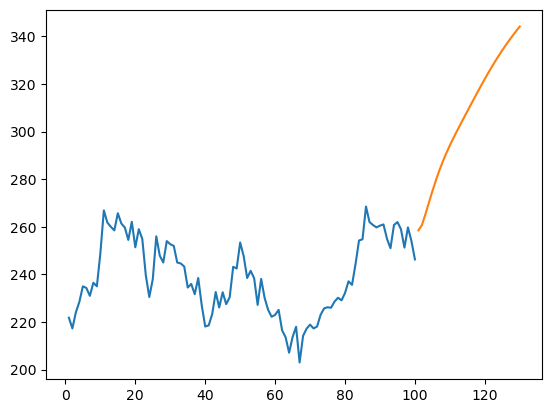

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[2951:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

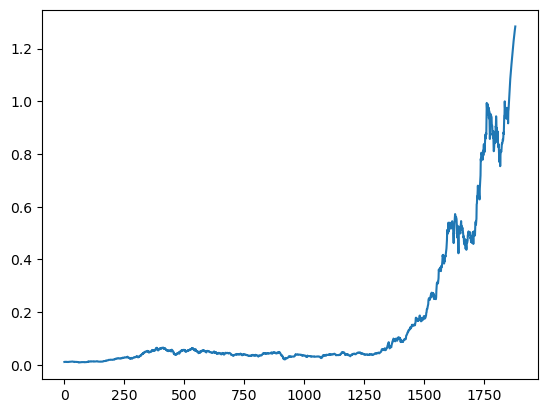

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

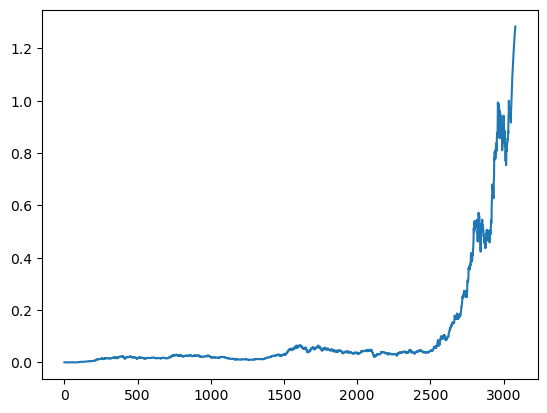

In [47]:
plt.plot(df3)
